
<font size = 4 color='Orange'>
Learning Goals</font>

<font color = 'Orange' size = 3 >In this Exercise your goal is to try different clustering algorithams on simple Iris Species dataset.

You need to report for each algorithm the clustering evaluation metrics into a table.</font>


<font color = 'Orange' size = 4 > Dataset </font>

<font color = 'Orange' size = 3>
The Dataset for Iris Species is public available on kaggle: https://www.kaggle.com/uciml/iris and also you have the code below for the dataset as part of  sklearn.datasets.
</font>
<ul>
<font color = 'Orange' size = 3>
Clustering algorithms

<li>K-Means Clustering</li>
<li>Agglomerative Clustering</li> 
<li>Affinity propagation Clustering</li> 
<li>Spectral Clustering</li> 
<li>DBSCAN Clustering</li>
</ul>
</font>

<ul>
<font color = 'Orange' size = 3>
Clustering evaluation metrics

<li>ARI - Adjusted Rand index</li>
<li>AMI - Adjusted mutual information</li> 
<li>Homogenity</li> 
<li>Completeness</li> 
<li>V-measure</li>
</ul>
</font>

<font color = 'Orange' size = 3>
Choose the best clustering algorithm from the table and make visualization of the genereted clusters. 
For the visualization first you need to make dimensionality reduction (PCA) on X data into 2D data and then use your best clustering algorithm for cluster prediction.
</font>



In [3]:
from sklearn import datasets

data = datasets.load_iris()
X, y = data.data, data.target

In [ ]:
X

In [ ]:
y

----

# As in the exercises, we make list of models of different clustering algorithms and feed it with the data.

In [12]:
import pandas as pd
from sklearn import metrics
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, SpectralClustering,DBSCAN

In [19]:
algorithms = []
algorithms.append(KMeans(n_clusters=3, random_state=1))
algorithms.append(AffinityPropagation())
algorithms.append(SpectralClustering(n_clusters=3, random_state=1,
                                     affinity='nearest_neighbors'))
algorithms.append(AgglomerativeClustering(n_clusters=3))
algorithms.append(DBSCAN())

In [20]:
data_list = []
for algo in algorithms:
    algo.fit(X)
    data_list.append(({
        'ARI': metrics.adjusted_rand_score(y, algo.labels_),
        'AMI': metrics.adjusted_mutual_info_score(y, algo.labels_,
                                                 average_method='arithmetic'),
        'Homogenity': metrics.homogeneity_score(y, algo.labels_),
        'Completeness': metrics.completeness_score(y, algo.labels_),
        'V-measure': metrics.v_measure_score(y, algo.labels_)}))


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."


In [21]:
results = pd.DataFrame(data=data_list, columns=['ARI', 'AMI', 'Homogenity',
                                           'Completeness', 'V-measure'],
                       index=['K-means', 'Affinity', 
                              'Spectral', 'Agglomerative','DBSCAN'])

results

,ARI,AMI,Homogenity,Completeness,V-measure
K-means,0.730238,0.755119,0.751485,0.764986,0.758176
Affinity,0.481172,0.659933,0.914941,0.527822,0.669446
Spectral,0.759199,0.803229,0.795982,0.815646,0.805694
Agglomerative,0.731199,0.767167,0.760801,0.779596,0.770084
DBSCAN,0.520619,0.598995,0.559946,0.656558,0.604416


# As we can see, Spectral Clustering makes the best clustering based on the evaluating functions.
It is pretty strong algorithm, useful when the structure of the individual clusters is highly non-convex, or more generally when a measure of the center and spread of the cluster is not a suitable description of the complete cluster, such as when clusters are nested circles on the 2D plane, as described in SciKit documentation.



#The second part is dimensionality reduction with PCA algorithm.

In [25]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA(2)
 
#Transform the data
X_new = pca.fit_transform(X)

In [37]:
model = SpectralClustering(n_clusters=3, random_state=1, affinity='nearest_neighbors')
model.fit(X_new)


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."


SpectralClustering(affinity='nearest_neighbors', n_clusters=3, random_state=1)

In [ ]:
clusters = model.labels_.tolist()
clusters

Evaluating the algorithm now that the dimension is reduced

In [39]:
eval_PCA = []

In [40]:
eval_PCA.append(({
        'ARI': metrics.adjusted_rand_score(y, model.labels_),
        'AMI': metrics.adjusted_mutual_info_score(y, model.labels_,
                                                 average_method='arithmetic'),
        'Homogenity': metrics.homogeneity_score(y, model.labels_),
        'Completeness': metrics.completeness_score(y, model.labels_),
        'V-measure': metrics.v_measure_score(y, model.labels_)}))


In [41]:
results_PCA = pd.DataFrame(data=eval_PCA, columns=['ARI', 'AMI', 'Homogenity',
                                           'Completeness', 'V-measure'],
                       index=['Spectral'])

results_PCA

,ARI,AMI,Homogenity,Completeness,V-measure
Spectral,0.717276,0.747583,0.742951,0.758693,0.750739


#The results are a bit worse, when the dimension is reduced!

#VISUALIZATION

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [64]:
label = model.fit_predict(X_new)
unique_labels = np.unique(label)
labels = model.labels_

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."


In [61]:
pred.size

150

In [62]:
unique_labels

array([0, 1, 2], dtype=int32)

In [ ]:
X_new

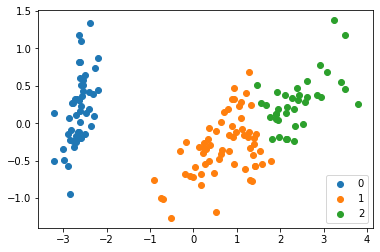

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#plotting the results:
for i in unique_labels:
    plt.scatter(X_new[label == i , 0] , X_new[label == i , 1] , label = i)
plt.legend()
plt.show()

#The conclusion is that the clustering is not the best, but it was expected as the evaluation results were 0.7 